In [ ]:
  #make sure fastai is up to date 
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
#import google drive package
from  google.colab import drive

In [ ]:
from fastai.vision import *

In [ ]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

In [ ]:
#save path to project folder 
root_path = 'gdrive/My Drive/'

In [ ]:
# uncomment to make balls folder 
(Path(root_path)/'Balls').mkdir(parents=True, exist_ok=True)

In [ ]:
#save path for balls folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/Balls/'

In [ ]:
#make folder names 
folders = ['golf','baseball','basketball','soccer','tennis','bowling','lacrosse','american_football','rugby','cricket','volleyball','dragon','pool','hockey','softball']

In [ ]:
#create all folders in /Balls
for i in folders:
 path = Path(proj_path)
 dest = (path/i).mkdir(parents=True, exist_ok=True)

In [ ]:
#save fastai path 
p_path = Path(proj_path)

In [ ]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['Balls',
 'american_football',
 'baseball',
 'basketball',
 'bowling',
 'cricket',
 'dragon',
 'golf',
 'hockey',
 'lacrosse',
 'pool',
 'rugby',
 'soccer',
 'softball',
 'tennis',
 'volleyball']

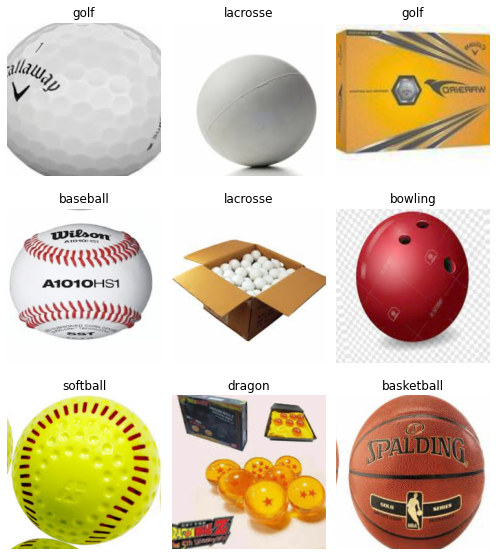

In [ ]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['Balls',
  'american_football',
  'baseball',
  'basketball',
  'bowling',
  'cricket',
  'dragon',
  'golf',
  'hockey',
  'lacrosse',
  'pool',
  'rugby',
  'soccer',
  'softball',
  'tennis',
  'volleyball'],
 16,
 1002,
 250)

In [ ]:
#create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.439105,1.083102,0.320000,01:29
1,1.957715,0.353774,0.096000,00:15
2,1.263767,0.313544,0.076000,00:14
3,0.875749,0.309071,0.076000,00:14
4,0.637061,0.330703,0.068000,00:14
5,0.491326,0.303512,0.064000,00:14
6,0.379149,0.290904,0.064000,00:14
7,0.308303,0.297146,0.064000,00:14


In [ ]:
#save model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/Balls/models/model1_34.pth')

In [ ]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


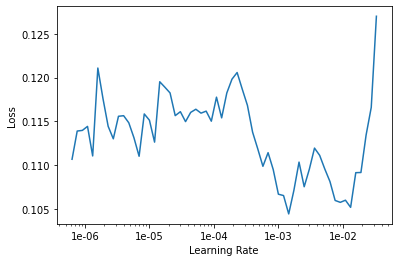

In [ ]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [ ]:
# fit whole model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.120028,0.288274,0.064000,00:14
1,0.120337,0.291033,0.060000,00:14


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


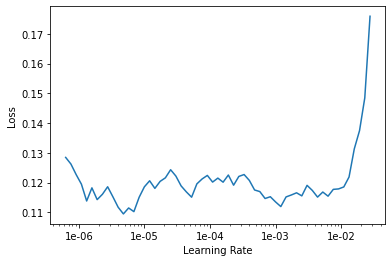

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('model2_34')

In [ ]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

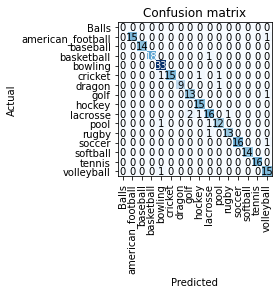

In [ ]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

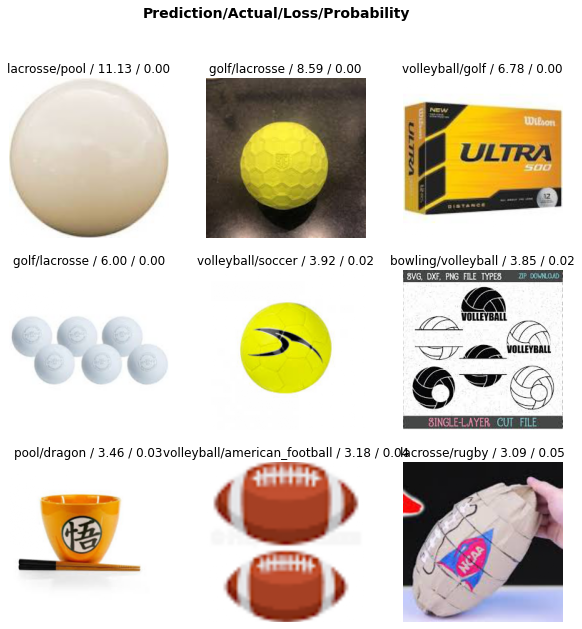

In [ ]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))

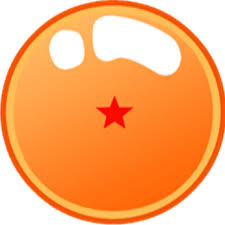

In [ ]:
#img_golf= open_image(Path(root_path)/'Balls_valid'/'golf_valid.jpg')
#img_golf
#img_tennis= open_image(Path(root_path)/'Balls_valid'/'tennis_valid.jpg')
#img_tennis
img_dragon= open_image(Path(root_path)/'Balls'/'dragon'/'dragon_valid.jpg')
img_dragon

In [ ]:
#pred_class,pred_idx,outputs = learn.predict(img_golf)
#pred_class
#pred_class,pred_idx,outputs = learn.predict(img_tennis)
#pred_class
pred_class,pred_idx,outputs = learn.predict(img_dragon)
pred_class

NameError: ignored

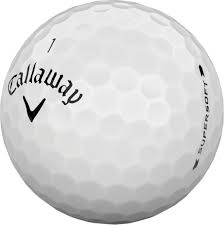

In [ ]:
img_golf= open_image(Path(root_path)/'Balls'/'golf'/'golf_valid.jpg')
img_golf

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img_golf)
print(pred_class)

golf
